# Instance-based learning w/ k-Nearest Neighbor

supervised

#### Setting up for classification analysis

In [4]:
import numpy as np
import pandas as pd
import scipy
import urllib
import sklearn

import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sb

from sklearn import neighbors
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [5]:
from sklearn.neighbors import KNeighborsClassifier

In [8]:
np.set_printoptions(precision=4, suppress=True) 
%matplotlib inline
rcParams['figure.figsize'] = 7, 4
sb.set_style('whitegrid')

## Importing your data

In [9]:
address = '../../data/mtcars.csv'

cars = pd.read_csv(address)
cars.columns = ['car_names','mpg','cyl','disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb']

X_prime = cars[['mpg', 'disp', 'hp', 'wt']].values
y = cars.iloc[:,9].values

In [10]:
X = preprocessing.scale(X_prime)

In [11]:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=.2, random_state=17)

## Building and training your model with training data

In [16]:
clf = neighbors.KNeighborsClassifier()
clf.fit(X_train, y_train)
print(clf.get_params())

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}


## Evaluating your model's predictions

In [17]:
y_pred= clf.predict(X_test)
y_expect = y_test

print(metrics.classification_report(y_expect, y_pred))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       1.00      0.67      0.80         3

    accuracy                           0.86         7
   macro avg       0.90      0.83      0.84         7
weighted avg       0.89      0.86      0.85         7



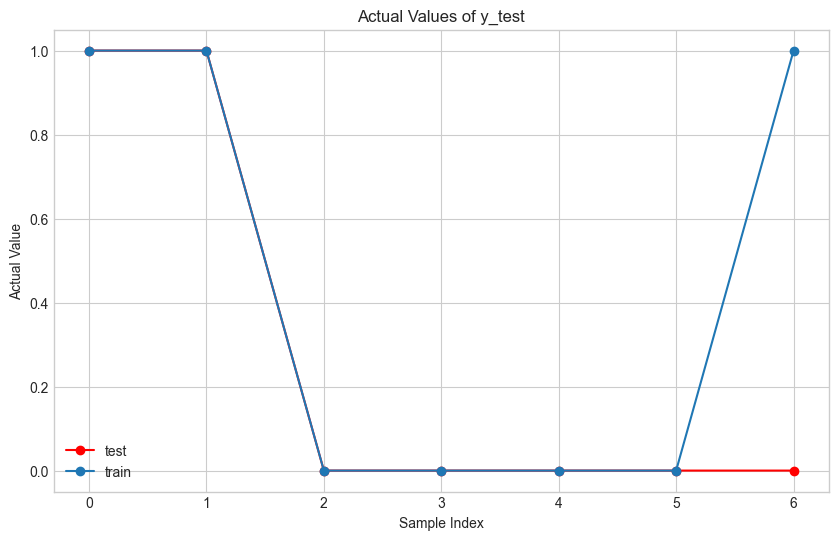

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_pred, marker='o', color='red', label='test')
plt.plot(y_expect , marker='o', label='train')
plt.xlabel('Sample Index')
plt.ylabel('Actual Value')
plt.title('Actual Values of y_test')
plt.legend()
plt.show()